In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt

In [21]:
import warnings
warnings.filterwarnings("ignore")

In [80]:
bd = pd.read_excel('DataBase.xlsx')

In [29]:
bd['minutes']

0        156.0
1        138.0
2         80.0
3         82.0
4        177.0
         ...  
25197     87.0
25198     77.0
25199     82.0
25200     59.0
25201     56.0
Name: minutes, Length: 25202, dtype: float64

In [81]:
bd = bd.dropna(subset=['tourney_id', 'tourney_name', 'tourney_level', 'tourney_date', 'match_num', 'winner_id', 'winner_name'])

In [82]:
y = float(bd['minutes'][bd['minutes']!=0].mean())
y

103.42848355613877

In [83]:
sigma = float(bd['minutes'][bd['minutes']!=0].std())
sigma

36.29034137889637

In [84]:
bd = bd[bd['minutes'] < y+2*sigma][bd['minutes'] > y-2*sigma]
bd

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,0,2022-7841,Bendigo CH,Hard,64,C,20220103,300,124014,8,...,70.0,51.0,24.0,16.0,4.0,7.0,164.0,422.0,179.0,370.0
1,1,2022-7841,Bendigo CH,Hard,64,C,20220103,299,111505,10,...,74.0,53.0,13.0,14.0,1.0,5.0,179.0,370.0,201.0,323.0
2,2,2022-7841,Bendigo CH,Hard,64,C,20220103,298,124014,8,...,36.0,22.0,6.0,8.0,4.0,8.0,164.0,422.0,157.0,436.0
3,3,2022-7841,Bendigo CH,Hard,64,C,20220103,297,106162,NaN,...,32.0,23.0,12.0,9.0,4.0,7.0,201.0,323.0,180.0,369.0
5,5,2022-7841,Bendigo CH,Hard,64,C,20220103,295,106099,5,...,54.0,38.0,12.0,13.0,4.0,7.0,157.0,436.0,150.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25197,4518,2024-2869,Skopje CH,Clay,32,C,20240520,241,210053,8,...,43.0,30.0,13.0,9.0,6.0,9.0,511.0,76.0,NaN,NaN
25198,4519,2024-2869,Skopje CH,Clay,32,C,20240520,240,208843,5,...,41.0,21.0,8.0,9.0,2.0,7.0,470.0,92.0,NaN,NaN
25199,4520,2024-2869,Skopje CH,Clay,32,C,20240520,239,207484,12,...,34.0,26.0,15.0,10.0,3.0,6.0,636.0,53.0,955.0,15.0
25200,4521,2024-2869,Skopje CH,Clay,32,C,20240520,238,144970,6,...,22.0,9.0,4.0,6.0,0.0,5.0,487.0,87.0,NaN,NaN


In [8]:
ForCorrel = bd.select_dtypes(include='number')

In [9]:
ForCorrel.corr()

,Unnamed: 0,draw_size,tourney_date,match_num,winner_id,winner_ht,winner_age,loser_id,loser_ht,loser_age,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
Unnamed: 0,1.000000,0.243340,-0.239077,-0.088124,-0.014616,0.034037,0.011757,-0.003367,0.011350,0.008232,...,0.015851,0.033148,0.015991,-0.022834,-0.006723,-0.022967,-0.055921,0.120297,-0.028578,0.090120
draw_size,0.243340,1.000000,0.009236,-0.324049,-0.039972,0.025670,0.028722,-0.055263,0.001754,0.041883,...,0.026690,0.047452,0.038079,-0.070900,-0.007242,-0.032157,-0.153730,0.195734,-0.141171,0.208542
tourney_date,-0.239077,0.009236,1.000000,0.000499,0.124882,-0.058253,0.017370,0.114932,-0.032943,0.012076,...,-0.004413,-0.006092,-0.006077,0.000626,-0.002239,-0.003923,0.024365,0.017247,0.005472,0.037064
match_num,-0.088124,-0.324049,0.000499,1.000000,0.005210,-0.015581,-0.017671,-0.015393,-0.008548,-0.003717,...,0.016462,0.010455,-0.003603,0.055065,0.010909,0.008957,-0.100527,0.033372,-0.114564,0.032899
winner_id,-0.014616,-0.039972,0.124882,0.005210,1.000000,-0.092872,-0.835253,0.033356,0.000121,-0.010630,...,-0.007171,-0.024278,-0.012048,-0.015502,0.010112,0.022586,0.167459,-0.174985,0.060147,-0.058558
winner_ht,0.034037,0.025670,-0.058253,-0.015581,-0.092872,1.000000,0.015871,-0.018698,0.017088,0.008790,...,0.034168,0.078420,0.054492,0.027636,-0.028094,-0.093698,-0.041350,0.067457,-0.049520,0.056310
winner_age,0.011757,0.028722,0.017370,-0.017671,-0.835253,0.015871,1.000000,-0.005307,0.000124,0.005795,...,0.004659,0.019660,0.008279,0.011758,-0.006265,-0.016007,-0.127614,0.135538,-0.033351,0.036957
loser_id,-0.003367,-0.055263,0.114932,-0.015393,0.033356,-0.018698,-0.005307,1.000000,-0.090132,-0.826136,...,-0.011875,-0.032808,-0.025519,-0.015921,0.016208,0.040413,0.083340,-0.090891,0.221716,-0.200103
loser_ht,0.011350,0.001754,-0.032943,-0.008548,0.000121,0.017088,0.000124,-0.090132,1.000000,0.027859,...,0.041871,0.116329,0.033461,0.058530,-0.020374,-0.078338,-0.019646,0.025381,-0.015143,0.042683
loser_age,0.008232,0.041883,0.012076,-0.003717,-0.010630,0.008790,0.005795,-0.826136,0.027859,1.000000,...,-0.002423,0.015599,0.022932,0.003855,-0.013802,-0.034974,-0.042945,0.058206,-0.172173,0.158106


In [10]:
len(bd['winner_ioc'].unique()) == len(bd['loser_ioc'].unique())

False

In [11]:
w = bd['w_df'].value_counts()
w = w.rename('first')
l = bd['l_df'].value_counts()
l = l.rename('second')
wl = pd.concat([w, l], axis=1)
wl

,first,second
1.0,5176.0,3841.0
2.0,4961.0,4652.0
3.0,3660.0,4211.0
0.0,3519.0,1794.0
4.0,2562.0,3282.0
5.0,1598.0,2197.0
6.0,876.0,1439.0
7.0,525.0,864.0
8.0,252.0,519.0
9.0,184.0,308.0


In [73]:
bd['kWon'] = bd['w_1stIn']/bd['w_svpt']
bd['kLose'] = bd['l_1stIn']/bd['l_svpt']

winCount = bd['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Hard']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
res = pd.concat([winCount, loseCount], axis=1)
res['wins'] = res['wins'].fillna(0)
res['loses'] = res['loses'].fillna(0)
res['winRate'] = winCount/(loseCount+winCount)
res['count'] = res['wins']+res['loses']
res = res[res['count'] > 2]
res['k'] = 0

for i in res.index:
    res.loc[i,'k'] = (bd[bd['winner_name'] == i]['kWon'].sum() + bd[bd['loser_name'] == i]['kLose'].sum()) / (bd[bd['winner_name'] == i]['kWon'].count() + bd[bd['loser_name'] == i]['kLose'].count())
res

/var/folders/85/nvry22pd6nx6pfd1c1h6z_nr0000gp/T/ipykernel_5662/223056442.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0.6387063925509363' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  res.loc[i,'k'] = (bd[bd['winner_name'] == i]['kWon'].sum() + bd[bd['loser_name'] == i]['kLose'].sum()) / (bd[bd['winner_name'] == i]['kWon'].count() + bd[bd['loser_name'] == i]['kLose'].count())


,wins,loses,winRate,count,k
Camilo Ugo Carabelli,96.0,6.0,0.941176,102.0,0.638706
Zsombor Piros,91.0,22.0,0.805310,113.0,0.589420
Tomas Machac,91.0,21.0,0.812500,112.0,0.615855
Luciano Darderi,90.0,4.0,0.957447,94.0,0.560590
Emilio Nava,90.0,42.0,0.681818,132.0,0.631636
...,...,...,...,...,...
Jiayang Dong,0.0,3.0,NaN,3.0,0.633769
Filiberto Fumagalli,0.0,3.0,NaN,3.0,0.604968
Peter Polansky,0.0,3.0,NaN,3.0,0.565543
Krittin Koaykul,0.0,3.0,NaN,3.0,0.543073


In [49]:
bd.head(2)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points,kWon,kLose
0,0,2022-7841,Bendigo CH,Hard,64,C,20220103,300,124014,8,...,24.0,16.0,4.0,7.0,164.0,422.0,179.0,370.0,0.767857,0.569106
1,1,2022-7841,Bendigo CH,Hard,64,C,20220103,299,111505,10,...,13.0,14.0,1.0,5.0,179.0,370.0,201.0,323.0,0.510204,0.666667


In [11]:
winCount = bd[bd['surface'] == 'Hard']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Hard']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
minGames = np.nanpercentile(res['sum'], 25)
res = res[res['sum']>minGames]
Hard = res.head(10)
Hard
# ‘Hard’, ‘Clay’, ‘Grass’, ‘Carpet’

,wins,loses,winRate,sum
Antoine Escoffier,73.0,63.0,0.536765,136.0
James Duckworth,78.0,36.0,0.684211,114.0
Aleksandar Kovacevic,78.0,35.0,0.690265,113.0
Adam Walton,69.0,37.0,0.650943,106.0
Emilio Nava,63.0,42.0,0.600000,105.0
Yasutaka Uchiyama,57.0,45.0,0.558824,102.0
Illya Marchenko,55.0,46.0,0.544554,101.0
Hiroki Moriya,43.0,56.0,0.434343,99.0
Denis Yevseyev,56.0,42.0,0.571429,98.0
Tennys Sandgren,57.0,41.0,0.581633,98.0


In [12]:
winCount = bd[bd['surface'] == 'Clay']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Clay']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
minGames = np.nanpercentile(res['sum'], 25)
res = res[res['sum']>minGames]
Clay = res.head(10)
Clay
# ‘Hard’, ‘Clay’, ‘Grass’, ‘Carpet’

,wins,loses,winRate,sum
Camilo Ugo Carabelli,91.0,45.0,0.669118,136.0
Luciano Darderi,87.0,49.0,0.639706,136.0
Roman Andres Burruchaga,72.0,57.0,0.558140,129.0
Renzo Olivo,62.0,59.0,0.512397,121.0
Francisco Comesana,79.0,40.0,0.663866,119.0
Santiago Fa Rodriguez Taverna,59.0,56.0,0.513043,115.0
Andrea Pellegrino,61.0,54.0,0.530435,115.0
Felipe Meligeni Alves,66.0,48.0,0.578947,114.0
Gonzalo Villanueva,52.0,61.0,0.460177,113.0
Andrea Collarini,55.0,56.0,0.495495,111.0


In [13]:
winCount = bd[bd['surface'] == 'Grass']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Grass']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
minGames = np.nanpercentile(res['sum'], 25)
res = res[res['sum']>minGames]
Grass = res.head(10)
Grass
# ‘Hard’, ‘Clay’, ‘Grass’, ‘Carpet’

,wins,loses,winRate,sum
Denis Kudla,11.0,7.0,0.611111,18.0
Gijs Brouwer,11.0,7.0,0.611111,18.0
Otto Virtanen,11.0,7.0,0.611111,18.0
Jordan Thompson,14.0,3.0,0.823529,17.0
Zizou Bergs,13.0,4.0,0.764706,17.0
Charles Broom,8.0,8.0,0.500000,16.0
Daniel Cox,9.0,7.0,0.562500,16.0
Pierre Hugues Herbert,9.0,6.0,0.600000,15.0
Andy Murray,13.0,1.0,0.928571,14.0
Jurij Rodionov,8.0,6.0,0.571429,14.0


In [14]:
winCount = bd[bd['surface'] == 'Carper']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Carpet']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
Carpet = res.head(10)
Carpet
# ‘Hard’, ‘Clay’, ‘Grass’, ‘Carpet’

,wins,loses,winRate,sum
Max Hans Rehberg,NaN,2,NaN,NaN
Kacper Zuk,NaN,2,NaN,NaN
Denis Yevseyev,NaN,2,NaN,NaN
Elmar Ejupovic,NaN,2,NaN,NaN
Vitaliy Sachko,NaN,2,NaN,NaN
Nerman Fatic,NaN,2,NaN,NaN
Michael Geerts,NaN,2,NaN,NaN
Lukas Klein,NaN,2,NaN,NaN
Daniel Masur,NaN,2,NaN,NaN
Marius Copil,NaN,2,NaN,NaN


In [15]:
winCount = bd[bd['surface'] == 'Clay']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Clay']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
minGames = np.nanpercentile(res['sum'], 25)
res = res[res['sum']>minGames]
res
# Clay

,wins,loses,winRate,sum
Camilo Ugo Carabelli,91.0,45.0,0.669118,136.0
Luciano Darderi,87.0,49.0,0.639706,136.0
Roman Andres Burruchaga,72.0,57.0,0.558140,129.0
Renzo Olivo,62.0,59.0,0.512397,121.0
Francisco Comesana,79.0,40.0,0.663866,119.0
...,...,...,...,...
Ryan Seggerman,5.0,3.0,0.625000,8.0
Adrian Mannarino,1.0,7.0,0.125000,8.0
Arthur Reymond,3.0,5.0,0.375000,8.0
Peter Gojowczyk,3.0,5.0,0.375000,8.0


In [16]:
winCount = bd[bd['surface'] == 'Grass']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Grass']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
minGames = np.nanpercentile(res['sum'], 25)
res = res[res['sum']>minGames]
res
# Grass

,wins,loses,winRate,sum
Denis Kudla,11.0,7.0,0.611111,18.0
Gijs Brouwer,11.0,7.0,0.611111,18.0
Otto Virtanen,11.0,7.0,0.611111,18.0
Jordan Thompson,14.0,3.0,0.823529,17.0
Zizou Bergs,13.0,4.0,0.764706,17.0
...,...,...,...,...
Felix Gill,1.0,3.0,0.250000,4.0
Vasek Pospisil,1.0,3.0,0.250000,4.0
Emilio Gomez,1.0,3.0,0.250000,4.0
Alastair Gray,1.0,3.0,0.250000,4.0


In [17]:
winCount = bd[bd['surface'] == 'Hard']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Hard']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res.fillna(0, inplace=True)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
minGames = np.nanpercentile(res['sum'], 25)
res = res[res['sum']>minGames]

wins = bd['winner_name'].value_counts()
wins = wins.rename('wins')
loses = bd['loser_name'].value_counts()
loses = loses.rename('loses')
all = pd.concat([wins, loses], axis=1)
all.fillna(0, inplace=True)
all['sumAll'] = all['wins'] + all['loses']
all['sumAll'] = all['sumAll']/all['sumAll'].max()
all

res = pd.concat([res, all['sumAll']], axis=1)
res

,wins,loses,winRate,sum,sumAll
Antoine Escoffier,73.0,63.0,0.536765,136.0,0.918239
James Duckworth,78.0,36.0,0.684211,114.0,0.786164
Aleksandar Kovacevic,78.0,35.0,0.690265,113.0,0.861635
Adam Walton,69.0,37.0,0.650943,106.0,0.679245
Emilio Nava,63.0,42.0,0.600000,105.0,0.930818
...,...,...,...,...,...
Shendrit Deari,NaN,NaN,NaN,NaN,0.006289
Roy Horovitz,NaN,NaN,NaN,NaN,0.006289
Seokhyeon Chu,NaN,NaN,NaN,NaN,0.006289
Alejo Sanchez Quilez,NaN,NaN,NaN,NaN,0.006289


In [24]:
winCount = bd[bd['surface'] == 'Hard']['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd[bd['surface'] == 'Hard']['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
winRate = winCount/(winCount+loseCount)
winRate = winRate.rename("winRate")
res = pd.concat([winCount, loseCount, winRate], axis=1)
res.fillna(0, inplace=True)
res['sum'] = res['wins'] + res['loses']
res.dropna()
res.sort_values(by='sum', ascending=False, inplace=True)
minGames = np.nanpercentile(res['sum'], 25)
res = res[res['sum']>minGames]

wins = bd['winner_name'].value_counts()
wins = wins.rename('wins')
loses = bd['loser_name'].value_counts()
loses = loses.rename('loses')
all = pd.concat([wins, loses], axis=1)
all.fillna(0, inplace=True)
all['sumAll'] = all['wins'] + all['loses']
all

res = pd.concat([res, all['sumAll']], axis=1)
res['k'] = res['winRate'] / res['sumAll']
res

,wins,loses,winRate,sum,sumAll,k
Antoine Escoffier,73.0,63.0,0.536765,136.0,146.0,0.003676
James Duckworth,78.0,36.0,0.684211,114.0,125.0,0.005474
Aleksandar Kovacevic,78.0,35.0,0.690265,113.0,137.0,0.005038
Adam Walton,69.0,37.0,0.650943,106.0,108.0,0.006027
Emilio Nava,63.0,42.0,0.600000,105.0,148.0,0.004054
...,...,...,...,...,...,...
Shendrit Deari,NaN,NaN,NaN,NaN,1.0,NaN
Roy Horovitz,NaN,NaN,NaN,NaN,1.0,NaN
Seokhyeon Chu,NaN,NaN,NaN,NaN,1.0,NaN
Alejo Sanchez Quilez,NaN,NaN,NaN,NaN,1.0,NaN


In [19]:
bd['score'] = bd['score'].str.replace(' RET', '')

In [22]:
len(bd['score'].unique())

2410

In [21]:
bd['score']

0           5-7 6-3 7-5
1        6-1 6-7(6) 6-4
2               6-3 6-1
3               6-4 6-2
5        4-6 7-6(5) 4-0
              ...      
25197           6-3 6-4
25198           7-5 6-0
25199           6-4 6-3
25200           6-0 6-1
25201           7-5 6-0
Name: score, Length: 23609, dtype: object

In [95]:
winCount = bd['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
res = pd.concat([winCount, loseCount], axis=1)
res['wins'] = res['wins'].fillna(0)
res['loses'] = res['loses'].fillna(0)
res['winRate'] = winCount/(loseCount+winCount)
res['count'] = res['wins']+res['loses']
res = res[res['count'] > 2]
res['minutes'] = 0

for i in res.index:
    res.loc[i,'minutes'] = (bd[bd['winner_name'] == i]['minutes'].sum() + bd[bd['loser_name'] == i]['minutes'].sum()) / (bd[bd['winner_name'] == i]['minutes'].count() + bd[bd['loser_name'] == i]['minutes'].count())

winRateByMinutes = pd.DataFrame({'winRate':[res[res['minutes'] > 0][res['minutes'] < 70]['winRate'].mean(), res[res['minutes'] >= 70][res['minutes'] < 80]['winRate'].mean(), res[res['minutes'] >= 80][res['minutes'] < 90]['winRate'].mean(), res[res['minutes'] >= 90][res['minutes'] < 100]['winRate'].mean(), res[res['minutes'] >= 100][res['minutes'] < 110]['winRate'].mean(), res[res['minutes'] >= 110]['winRate'].mean()], 'minutes':['0-70', '70-80', '80-90', '90-100', '100-110', '110+']})
winRateByMinutes

,winRate,minutes
0,0.323627,0-70
1,0.278869,70-80
2,0.353011,80-90
3,0.443290,90-100
4,0.475507,100-110
5,0.449700,110+


In [13]:
bd.to_excel('/Users/ssd/Downloads/dataBase.xlsx')

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [109]:
winCount = bd['winner_name'].value_counts()
winCount = winCount.rename("wins")
loseCount = bd['loser_name'].value_counts()
loseCount = loseCount.rename('loses')
res = pd.concat([winCount, loseCount], axis=1)
res['wins'] = res['wins'].fillna(0)
res['loses'] = res['loses'].fillna(0)
res['winRate'] = winCount/(loseCount+winCount)
res['count'] = res['wins']+res['loses']
res = res[res['count'] > 2]
res['minutes'] = 0
res['age'] = 0
res['height'] = 0

for i in res.index:
    res.loc[i,'minutes'] = (bd[bd['winner_name'] == i]['minutes'].sum() + bd[bd['loser_name'] == i]['minutes'].sum()) / (bd[bd['winner_name'] == i]['minutes'].count() + bd[bd['loser_name'] == i]['minutes'].count())

    res.loc[i,'age'] = (bd[bd['winner_name'] == i]['winner_age'].sum() + bd[bd['loser_name'] == i]['winner_age'].sum()) / (bd[bd['winner_name'] == i]['winner_age'].count() + bd[bd['loser_name'] == i]['winner_age'].count())

    res.loc[i,'height'] = (bd[bd['winner_name'] == i]['winner_ht'].sum() + bd[bd['loser_name'] == i]['winner_ht'].sum()) / (bd[bd['winner_name'] == i]['winner_ht'].count() + bd[bd['loser_name'] == i]['winner_ht'].count())
corr_matrix = res[['minutes', 'age', 'height', 'winRate']].corr()

plt.figure()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix')
plt.show()
# winRateByMinutes = pd.DataFrame({'winRate':[res[res['minutes'] > 0][res['minutes'] < 70]['winRate'].mean(), res[res['minutes'] >= 70][res['minutes'] < 80]['winRate'].mean(), res[res['minutes'] >= 80][res['minutes'] < 90]['winRate'].mean(), res[res['minutes'] >= 90][res['minutes'] < 100]['winRate'].mean(), res[res['minutes'] >= 100][res['minutes'] < 110]['winRate'].mean(), res[res['minutes'] >= 110]['winRate'].mean()], 'minutes':['0-70', '70-80', '80-90', '90-100', '100-110', '110+']})
# winRateByMinutes

,winRate,minutes
0,0.323627,0-70
1,0.278869,70-80
2,0.353011,80-90
3,0.443290,90-100
4,0.475507,100-110
5,0.449700,110+


In [111]:
import seaborn as sns

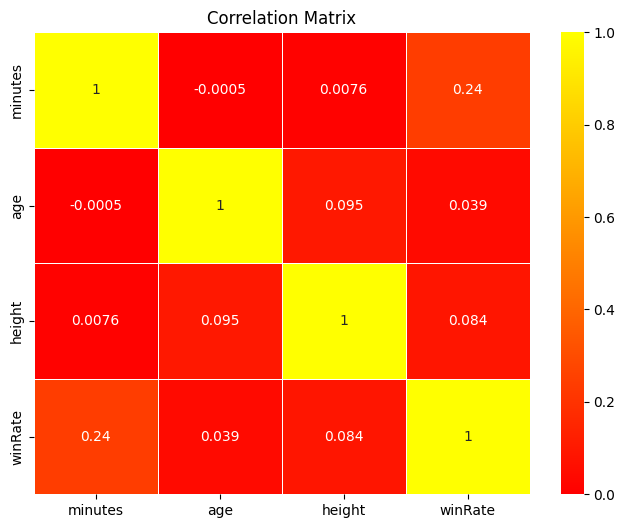

In [128]:
corr_matrix = res[['minutes', 'age', 'height', 'winRate']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, linewidths=.5, cmap='autumn')
plt.title('Correlation Matrix')
plt.show()

In [60]:
from scipy.stats import pearsonr

In [71]:
res['minutes'] = res['minutes'].astype(int)
df = res[['minutes', 'winRate']]
df.reset_index(drop=True, inplace=True)
df = df.dropna()
p_values = pearsonr(df['minutes'], df['winRate'])
p_values

PearsonRResult(statistic=np.float64(0.20561940563660097), pvalue=np.float64(2.866991530238064e-09))

In [27]:
len(bd['winner_name'].unique()) == len((bd['winner_id'].unique())

SyntaxError: unexpected EOF while parsing (1387175774.py, line 1)

In [73]:
bd['minutes'] = bd['minutes'].dropna().astype(int)
value_counts = bd['minutes'].value_counts()
value_counts

minutes
85    366
83    354
77    350
80    346
81    337
     ... 
45     28
40     20
42     19
41     18
43     17
Name: count, Length: 123, dtype: int64

In [67]:
y = float(bd['minutes'][bd['minutes']!=0].mean())
sigma = float(bd['minutes'][bd['minutes']!=0].std())
bd = bd[bd['minutes'] < y+2*sigma][bd['minutes'] > y-2*sigma]
bd['minutes'] = bd['minutes'].dropna().astype(int)
# value_counts = bd['minutes'].value_counts()
# value_counts

In [72]:
res['minutes'] = res['minutes'].astype(int)
df = res[['minutes', 'winRate']]
df.reset_index(drop=True, inplace=True)
df.corr()

,minutes,winRate
minutes,1.000000,0.205619
winRate,0.205619,1.000000


In [77]:
(bd['winner_ht'].sum()+bd['loser_ht'].sum())/(bd['winner_ht'].count()+bd['loser_ht'].count())

np.float64(184.75105192205564)

,Unnamed: 0,tourney_id,tourney_name,surface,draw_size,tourney_level,tourney_date,match_num,winner_id,winner_seed,...,l_1stIn,l_1stWon,l_2ndWon,l_SvGms,l_bpSaved,l_bpFaced,winner_rank,winner_rank_points,loser_rank,loser_rank_points
0,0,2022-7841,Bendigo CH,Hard,64,C,20220103,300,124014,8,...,70.0,51.0,24.0,16.0,4.0,7.0,164.0,422.0,179.0,370.0
1,1,2022-7841,Bendigo CH,Hard,64,C,20220103,299,111505,10,...,74.0,53.0,13.0,14.0,1.0,5.0,179.0,370.0,201.0,323.0
2,2,2022-7841,Bendigo CH,Hard,64,C,20220103,298,124014,8,...,36.0,22.0,6.0,8.0,4.0,8.0,164.0,422.0,157.0,436.0
3,3,2022-7841,Bendigo CH,Hard,64,C,20220103,297,106162,NaN,...,32.0,23.0,12.0,9.0,4.0,7.0,201.0,323.0,180.0,369.0
5,5,2022-7841,Bendigo CH,Hard,64,C,20220103,295,106099,5,...,54.0,38.0,12.0,13.0,4.0,7.0,157.0,436.0,150.0,450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25197,4518,2024-2869,Skopje CH,Clay,32,C,20240520,241,210053,8,...,43.0,30.0,13.0,9.0,6.0,9.0,511.0,76.0,NaN,NaN
25198,4519,2024-2869,Skopje CH,Clay,32,C,20240520,240,208843,5,...,41.0,21.0,8.0,9.0,2.0,7.0,470.0,92.0,NaN,NaN
25199,4520,2024-2869,Skopje CH,Clay,32,C,20240520,239,207484,12,...,34.0,26.0,15.0,10.0,3.0,6.0,636.0,53.0,955.0,15.0
25200,4521,2024-2869,Skopje CH,Clay,32,C,20240520,238,144970,6,...,22.0,9.0,4.0,6.0,0.0,5.0,487.0,87.0,NaN,NaN


In [105]:
bd['winner_hand']

0        R
1        R
2        R
3        L
5        R
        ..
25197    U
25198    R
25199    R
25200    L
25201    U
Name: winner_hand, Length: 23609, dtype: object

In [108]:
res['minutes'] = res['minutes'].astype(int)
df = res[['minutes', 'winRate']]
df.reset_index(drop=True, inplace=True)
# corr_matrix = df.corr()
# 
# plt.figure(figsize=(8, 6))
# sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
# plt.title('Correlation Matrix')
# plt.show()
df

,minutes,winRate
0,109,0.648649
1,97,0.631944
2,95,0.739837
3,106,0.625000
4,100,0.608108
...,...,...
1197,69,NaN
1198,66,NaN
1199,100,NaN
1200,75,NaN


In [107]:
import seaborn as sns

In [94]:
winRateByMinutes = pd.DataFrame({'winRate':[res[res['minutes'] > 0][res['minutes'] < 70]['winRate'].mean(), res[res['minutes'] >= 70][res['minutes'] < 80]['winRate'].mean(), res[res['minutes'] >= 80][res['minutes'] < 90]['winRate'].mean(), res[res['minutes'] >= 90][res['minutes'] < 100]['winRate'].mean(), res[res['minutes'] >= 100][res['minutes'] < 110]['winRate'].mean(), res[res['minutes'] >= 110]['winRate'].mean()], 'minutes':['0-70', '70-80', '80-90', '90-100', '100-110', '110+']})
winRateByMinutes

,winRate,minutes
0,NaN,0-70
1,NaN,70-80
2,0.633197,80-90
3,0.609136,90-100
4,0.571210,100-110
5,0.577641,110+


In [97]:
res

,wins,loses,winRate,count,minutes
Camilo Ugo Carabelli,96.0,52.0,0.648649,148.0,109.918919
Zsombor Piros,91.0,53.0,0.631944,144.0,97.840278
Tomas Machac,91.0,32.0,0.739837,123.0,95.447154
Luciano Darderi,90.0,54.0,0.625000,144.0,106.916667
Emilio Nava,90.0,58.0,0.608108,148.0,100.466216
...,...,...,...,...,...
Santiago Padilla Cote,0.0,3.0,NaN,3.0,69.333333
Manish Ganesh,0.0,3.0,NaN,3.0,66.000000
Alessandro Spadola,0.0,3.0,NaN,3.0,100.000000
Lucio Ratti,0.0,3.0,NaN,3.0,75.666667


In [99]:
winCountHard = bd[bd['surface'] == 'Hard']['winner_name'].value_counts()
winCountHard = winCountHard.rename("wins")
loseCountHard = bd[bd['surface'] == 'Hard']['loser_name'].value_counts()
loseCountHard = loseCountHard.rename('loses')
Hard = pd.concat([winCountHard, loseCountHard], axis=1)
Hard['wins'] = Hard['wins'].fillna(0)
Hard['loses'] = Hard['loses'].fillna(0)
Hard['winRate'] = winCountHard/(loseCountHard+winCountHard)
Hard['count'] = Hard['wins']+Hard['loses']
Hard = Hard[Hard['count'] > 2]
Hard['minutes'] = 0

for i in Hard.index:
    Hard.loc[i,'minutes'] = (bd[bd['winner_name'] == i]['minutes'].sum() + bd[bd['loser_name'] == i]['minutes'].sum()) / (bd[bd['winner_name'] == i]['minutes'].count() + bd[bd['loser_name'] == i]['minutes'].count())

winRateByMinutesHard = pd.DataFrame({'winRate':[Hard[Hard['minutes'] > 0][Hard['minutes'] < 70]['winRate'].mean(), Hard[Hard['minutes'] >= 70][Hard['minutes'] < 80]['winRate'].mean(), Hard[Hard['minutes'] >= 80][Hard['minutes'] < 90]['winRate'].mean(), Hard[Hard['minutes'] >= 90][Hard['minutes'] < 100]['winRate'].mean(), Hard[Hard['minutes'] >= 100][Hard['minutes'] < 110]['winRate'].mean(), Hard[Hard['minutes'] >= 110]['winRate'].mean()], 'minutes':['0-70', '70-80', '80-90', '90-100', '100-110', '110+']})
winRateByMinutesHard

,winRate,minutes
0,0.316667,0-70
1,0.327937,70-80
2,0.389643,80-90
3,0.456826,90-100
4,0.469886,100-110
5,0.469842,110+


In [100]:
winCountClay = bd[bd['surface'] == 'Hard']['winner_name'].value_counts()
winCountClay = winCountClay.rename("wins")
loseCountClay = bd[bd['surface'] == 'Hard']['loser_name'].value_counts()
loseCountClay = loseCountClay.rename('loses')
Clay = pd.concat([winCountClay, loseCountClay], axis=1)
Clay['wins'] = Clay['wins'].fillna(0)
Clay['loses'] = Clay['loses'].fillna(0)
Clay['winRate'] = winCountClay/(loseCountClay+winCountClay)
Clay['count'] = Clay['wins']+Clay['loses']
Clay = Clay[Clay['count'] > 2]
Clay['minutes'] = 0

for i in Clay.index:
    Clay.loc[i,'minutes'] = (bd[bd['winner_name'] == i]['minutes'].sum() + bd[bd['loser_name'] == i]['minutes'].sum()) / (bd[bd['winner_name'] == i]['minutes'].count() + bd[bd['loser_name'] == i]['minutes'].count())

winRateByMinutesClay = pd.DataFrame({'winRate':[Clay[Clay['minutes'] > 0][Clay['minutes'] < 70]['winRate'].mean(), Clay[Clay['minutes'] >= 70][Clay['minutes'] < 80]['winRate'].mean(), Clay[Clay['minutes'] >= 80][Clay['minutes'] < 90]['winRate'].mean(), Clay[Clay['minutes'] >= 90][Clay['minutes'] < 100]['winRate'].mean(), Clay[Clay['minutes'] >= 100][Clay['minutes'] < 110]['winRate'].mean(), Clay[Clay['minutes'] >= 110]['winRate'].mean()], 'minutes':['0-70', '70-80', '80-90', '90-100', '100-110', '110+']})
winRateByMinutesHard

,winRate,minutes
0,0.316667,0-70
1,0.327937,70-80
2,0.389643,80-90
3,0.456826,90-100
4,0.469886,100-110
5,0.469842,110+
